In [4]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, linregress
import statsmodels.api as sm
import seaborn as sns



In [5]:
# Liste des fichiers et lecture des données
files = {
    'Growth': 'MSCI_EUROPE_GROWTH.xlsx',
    'Large': 'MSCI_EUROPE_LARGE.xlsx',
    'Momemtum': 'MSCI_EUROPE_MOMENTUM.xlsx',
    'Quality': 'MSCI_EUROPE_QUALITY.xlsx',
    'Small': 'MSCI_EUROPE_SMALL.xlsx',
    'Value': 'MSCI_EUROPE_VALUE.xlsx',
    'Market': 'MSCI_EUROPE.xlsx',
    'LowVol': 'MSCI_EUROPE_LOW_VOL.xlsx'
}

filtered_data = {}  # Initialize the dictionary to store filtered data
annual_results = {}  # Initialize the dictionary to store annual results

In [ ]:
# Statitisques descriptives, kurtosis, skewness et max drawdown

# Boucle pour lire chaque fichier Excel, le transformer et l'enregistrer en CSV
for key, file in files.items():
    data = pd.read_excel(file)

    # Supprimer les lignes inutiles et renommer les colonnes
    data.columns = data.iloc[1]
    data = data.drop([0, 1]).reset_index(drop=True)

    # Convertir la colonne 'Date' en type datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Filtrer les données pour conserver uniquement les dates entre le 31/12/1998 et le 31/12/2024
    data = data[(data['Date'] > '1998-12-31') & (data['Date'] <= '2024-12-31')]

    # Supposons que la colonne 'Price' contient les prix
    # Convertir la colonne 'Price' en float
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

    # Vérifier et gérer les valeurs manquantes dans 'Price'
    if data['Price'].isnull().any():
        data['Price'] = data['Price'].fillna(method='ffill')  # Remplir les valeurs manquantes par la valeur précédente

    # Calculer le '% Change' basé sur le logarithme naturel
    data['% Change'] = np.log(data['Price'] / data['Price'].shift(1))

    # Calculer le Total Return
    data['Total Return'] = (1 + data['% Change']).cumprod() - 1


    # Enregistrer les données transformées dans un fichier CSV
    csv_file = f'{key}.csv'
    data.to_csv(csv_file, index=False)

    print(f"Fichier {csv_file} créé avec succès.")

    # Store the filtered data in the dictionary
    filtered_data[key] = data

    # Calculer et afficher les statistiques descriptives, kurtosis, skewness et max drawdown
    print(f"Statistiques descriptives pour {key}:")
    print(data[['% Change', 'Total Return']].describe())

    # Calculer la kurtosis et le skewness
    change_kurtosis = kurtosis(data['% Change'].dropna())
    change_skewness = skew(data['% Change'].dropna())

    print(f"\nKurtosis pour '% Change': {change_kurtosis}")
    print(f"Skewness pour '% Change': {change_skewness}")


Fichier Growth.csv créé avec succès.
Statistiques descriptives pour Growth:
1        % Change  Total Return
count  311.000000    311.000000
mean     0.002116     -0.064985
std      0.041985      0.276475
min     -0.121008     -0.538486
25%     -0.020585     -0.288084
50%      0.008115     -0.080943
75%      0.027773      0.110121
max      0.120587      0.562152

Kurtosis pour '% Change': 0.599745968605855
Skewness pour '% Change': -0.47417205925484185
Fichier Large.csv créé avec succès.
Statistiques descriptives pour Large:
1        % Change  Total Return
count  311.000000    311.000000
mean     0.001311     -0.118573
std      0.043125      0.176956
min     -0.154896     -0.519219
25%     -0.021648     -0.263622
50%      0.008153     -0.119207
75%      0.027741     -0.007892
max      0.130241      0.361993

Kurtosis pour '% Change': 1.248754651013905
Skewness pour '% Change': -0.5935874987396389
Fichier Momemtum.csv créé avec succès.
Statistiques descriptives pour Momemtum:
1        % 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3446582534.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')  # Remplir les valeurs manquantes par la valeur précédente


Fichier Small.csv créé avec succès.
Statistiques descriptives pour Small:
1        % Change  Total Return
count  311.000000    311.000000
mean     0.004690      0.885208
std      0.052544      0.684420
min     -0.240730     -0.281658
25%     -0.021184      0.285307
50%      0.010588      0.816474
75%      0.037591      1.499578
max      0.191300      2.410661

Kurtosis pour '% Change': 3.147125851519215
Skewness pour '% Change': -0.9652082547181479
Fichier Value.csv créé avec succès.
Statistiques descriptives pour Value:
1        % Change  Total Return
count  311.000000    311.000000
mean     0.000893     -0.081383
std      0.048996      0.215325
min     -0.218208     -0.471002
25%     -0.025634     -0.223913
50%      0.008118     -0.137214
75%      0.031241      0.017868
max      0.177003      0.504455

Kurtosis pour '% Change': 2.463037868028467
Skewness pour '% Change': -0.6539095473885435
Fichier Market.csv créé avec succès.
Statistiques descriptives pour Market:
1        % Change 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3446582534.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')  # Remplir les valeurs manquantes par la valeur précédente


In [7]:
# Beta sur toute la période

import pandas as pd
import numpy as np
from scipy.stats import linregress

# Dictionnaire pour stocker les résultats de bêta et de significativité
beta_results = {}

# Liste pour stocker les résultats
all_beta_results = []

# Calculer le bêta pour chaque indice par rapport à l'indice de marché
market_data = filtered_data['Market']

for key, data in filtered_data.items():
    if key != 'Market':
        # Calculer le '% Change' basé sur le logarithme naturel des prix
        data['% Change'] = np.log(data['Price'] / data['Price'].shift(1))

        # Aligner les données avec celles de l'indice de marché
        merged_data = pd.merge(data[['Date', '% Change']], market_data[['Date', '% Change']], on='Date', suffixes=('', '_Market'))

        # Supprimer les valeurs manquantes
        merged_data = merged_data.dropna(subset=['% Change', '% Change_Market'])

        # Vérifier s'il reste des données après suppression des valeurs manquantes
        if not merged_data.empty:
            # Calculer le bêta en utilisant la régression linéaire
            slope, intercept, r_value, p_value, std_err = linregress(merged_data['% Change_Market'], merged_data['% Change'])

            # Stocker les résultats de bêta et de significativité
            beta_results[key] = {
                'Beta': slope,
                'P-Value': p_value,
                'Significance': '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''
            }
        else:
            beta_results[key] = {
                'Beta': None,
                'P-Value': None,
                'Significance': ''
            }

        # Ajouter les résultats à la liste
        all_beta_results.append(beta_results[key])

# Créer un DataFrame pour afficher les résultats
beta_results_df = pd.DataFrame(all_beta_results, index=[key for key in beta_results.keys()])

# Afficher les résultats de bêta pour chaque indice
print("Bêtas pour chaque stratégie par rapport à l'indice de marché :")
display(beta_results_df)

# Exporter les résultats dans un fichier CSV
csv_file_path = 'beta_results_with_significance.csv'
beta_results_df.to_csv(csv_file_path)

print(f"Les résultats de bêta ont été exportés vers {csv_file_path}")

Bêtas pour chaque stratégie par rapport à l'indice de marché :


,Beta,P-Value,Significance
Growth,0.918696,1.878094e-159,***
Large,0.990172,0.000000e+00,***
Momemtum,0.820374,1.727790e-90,***
Quality,0.814762,8.163309e-128,***
Small,1.090670,8.970367e-115,***
Value,1.085920,2.634205e-178,***
LowVol,0.695935,6.439473e-114,***


Les résultats de bêta ont été exportés vers beta_results_with_significance.csv


In [ ]:
# Rentabilité, volatilité et ratio de Sharpe all periods

# Initialiser un dictionnaire pour stocker les résultats moyens
average_results = {}

# Calculer les métriques moyennes pour chaque indice
for key, data in filtered_data.items():
    # Calculer les rendements annuels moyens
    annual_returns = data.groupby(data['Date'].dt.year)['% Change'].apply(lambda x: (1 + x).prod() - 1)
    average_annual_return = annual_returns.mean()

    # Calculer la volatilité annuelle moyenne
    annual_volatility = data['% Change'].std() * np.sqrt(12)

    # Calculer le ratio de Sharpe annuel moyen
    average_sharpe_ratio = annual_returns.mean() / annual_returns.std()

    # Stocker les résultats moyens
    average_results[key] = {
        'Average Annual Return': average_annual_return,
        'Average Annual Volatility': annual_volatility,
        'Average Sharpe Ratio': average_sharpe_ratio
    }

# Convertir les résultats moyens en DataFrame pour un affichage structuré
average_results_df = pd.DataFrame(average_results).T

# Afficher les résultats moyens sous forme de tableau
print("Métriques Moyennes pour Chaque Indice :")
print(average_results_df)


Métriques Moyennes pour Chaque Indice :
          Average Annual Return  Average Annual Volatility  \
Growth                 0.033831                   0.145439   
Large                  0.022108                   0.149389   
Momemtum               0.065646                   0.143732   
Quality                0.047695                   0.131965   
Small                  0.071326                   0.182018   
Value                  0.015954                   0.169726   
Market                 0.026264                   0.150540   
LowVol                 0.037452                   0.112233   

          Average Sharpe Ratio  
Growth                0.179981  
Large                 0.123509  
Momemtum              0.334662  
Quality               0.286332  
Small                 0.294966  
Value                 0.085337  
Market                0.144745  
LowVol                0.266855  


In [ ]:
# Rentabilité, volatilité et ratio de Sharpe par année

# Calculate annual performance metrics
for key, data in filtered_data.items():
    # Ajouter une colonne pour l'année
    data['Year'] = data['Date'].dt.year

    # Calculer la performance, la volatilité et le ratio de Sharpe pour chaque année
    annual_summary = data.groupby('Year').apply(lambda x: {
        'Annual Return': (1 + x['% Change']).prod() - 1,
        'Annual Volatility': x['% Change'].std() * np.sqrt(252),  # 252 jours de trading par an
        'Sharpe Ratio': ((1 + x['% Change']).prod() - 1) / (x['% Change'].std() * np.sqrt(252))
    })

    # Convertir le résultat en DataFrame
    annual_summary = pd.DataFrame(annual_summary.tolist(), index=annual_summary.index)
    annual_results[key] = annual_summary


    data['Cumulative Peak Price'] = data['Price'].cummax()
    data['Drawdown Price'] = data['Price'] - data['Cumulative Peak Price']
    max_drawdown_price = data['Drawdown Price'].min()
    max_drawdown_percentage = (max_drawdown_price / data['Cumulative Peak Price'].iloc[data['Drawdown Price'].idxmin()]) * 100


# Afficher les résultats pour chaque actif
for key, result in annual_results.items():
    print(f"Résultats annuels pour {key} :")
    print(result, "\n")
    print(f"Maximum Drawdown {max_drawdown_percentage}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\584648088.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_summary = data.groupby('Year').apply(lambda x: {
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\584648088.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_summary = data.groupby('Year').apply(lambda x: {
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\584648088.py:7: DeprecationWar

Résultats annuels pour Growth :
      Annual Return  Annual Volatility  Sharpe Ratio
Year                                                
1999       0.264360           0.843693      0.313337
2000      -0.129883           0.733931     -0.176969
2001      -0.230135           0.970574     -0.237112
2002      -0.340756           0.951159     -0.358254
2003       0.055453           0.692274      0.080103
2004       0.061176           0.308368      0.198387
2005       0.207956           0.347107      0.599112
2006       0.140478           0.375512      0.374097
2007       0.053085           0.380123      0.139652
2008      -0.440161           0.913813     -0.481675
2009       0.243708           0.716256      0.340252
2010       0.148318           0.481782      0.307852
2011      -0.098549           0.702884     -0.140206
2012       0.142331           0.490285      0.290303
2013       0.152281           0.370469      0.411048
2014       0.056272           0.377712      0.148981
2015       0.1

In [ ]:
# Préparation des données pour l'analyse Fama French

# Charger les données de Fama French
fama_french_data = pd.read_csv('Europe_5_Factors_v2.csv', delimiter=';')
fama_french_data['Date'] = pd.to_datetime(fama_french_data['Date'], format='%m/%d/%y')

# Calculer les performances annuelles et intégrer les facteurs de Fama French
for key, data in filtered_data.items():
    # Ajouter une colonne pour l'année
    data['Year'] = data['Date'].dt.year

    # Fusionner avec les données de Fama French
    merged_data = pd.merge(data, fama_french_data, on='Date', how='inner')

    # Calculer le '% Change' basé sur le logarithme naturel des prix
    merged_data['% Change'] = np.log(merged_data['Price'] / merged_data['Price'].shift(1))

    # Calculer la performance, la volatilité et le ratio de Sharpe pour chaque année
    annual_summary = merged_data.groupby('Year').apply(lambda x: {
        'Annual Return': (1 + x['% Change']).prod() - 1,
        'Annual Volatility': x['% Change'].std() * np.sqrt(252),  # 252 jours de trading par an
        'Sharpe Ratio': ((1 + x['% Change']).prod() - 1 - x['RF'].mean()) / (x['% Change'].std() * np.sqrt(252)),
        # Ajouter les facteurs de Fama French
        'Rm-Rf': x['Mkt-RF'].mean(),
        'SMB': x['SMB'].mean(),
        'HML': x['HML'].mean(),
        'RMW': x['RMW'].mean(),
        'CMA': x['CMA'].mean(),
        'RF': x['RF'].mean()
    })

    # Convertir le résultat en DataFrame
    annual_summary = pd.DataFrame(annual_summary.tolist(), index=annual_summary.index)
    annual_results[key] = annual_summary

    # Calculer le Maximum Drawdown
    merged_data['Cumulative Peak Price'] = merged_data['Price'].cummax()
    merged_data['Drawdown Price'] = merged_data['Price'] - merged_data['Cumulative Peak Price']
    max_drawdown_price = merged_data['Drawdown Price'].min()
    max_drawdown_percentage = (max_drawdown_price / merged_data['Cumulative Peak Price'].iloc[merged_data['Drawdown Price'].idxmin()]) * 100

# Afficher les résultats pour chaque actif
for key, result in annual_results.items():
    print(f"Résultats annuels pour {key} :")
    print(result, "\n")
    print(f"Maximum Drawdown: {max_drawdown_percentage:.2f}%\n")


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\780028333.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_summary = merged_data.groupby('Year').apply(lambda x: {
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\780028333.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_summary = merged_data.groupby('Year').apply(lambda x: {
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\780028333.py:1

Résultats annuels pour Growth :
      Annual Return  Annual Volatility  Sharpe Ratio     Rm-Rf       SMB  \
Year                                                                       
1999       0.265188           0.859215      0.304143  0.016264  0.004300   
2000      -0.129883           0.733931     -0.183475 -0.012725 -0.003200   
2001      -0.230135           0.970574     -0.240341 -0.020050  0.001567   
2002      -0.340012           0.954312     -0.357710 -0.017791  0.009373   
2003       0.055453           0.692274      0.078875  0.030308  0.009350   
2004       0.061241           0.317442      0.189714  0.017664  0.008500   
2005       0.207956           0.347107      0.592054  0.007233  0.005383   
2006       0.140478           0.375512      0.363644  0.023017  0.005283   
2007       0.053085           0.380123      0.129633  0.007900 -0.006275   
2008      -0.440161           0.913813     -0.483116 -0.047650 -0.007825   
2009       0.243708           0.716256      0.340148  0.

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\780028333.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_summary = merged_data.groupby('Year').apply(lambda x: {
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\780028333.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_summary = merged_data.groupby('Year').apply(lambda x: {


In [ ]:
# Résultats annuels Fama et French 

# Initialiser une chaîne de caractères pour stocker les résultats
output_text = ""

# Ajouter les résultats annuels pour chaque actif à la chaîne de caractères
for key, result in annual_results.items():
    output_text += f"Résultats annuels pour {key} :\n"
    output_text += result.to_string(index=True) + "\n\n"

# Afficher les résultats formatés
print(output_text)

# Convertir le dictionnaire en DataFrame pour l'exportation
results_df = pd.concat(annual_results, names=['Index', 'Year'])

# Exporter les résultats dans un fichier Excel
results_df.to_excel('annual_results.xlsx')

print("Les résultats ont été exportés dans le fichier 'annual_results.xlsx'.")


Résultats annuels pour Growth :
      Annual Return  Annual Volatility  Sharpe Ratio     Rm-Rf       SMB       HML       RMW       CMA        RF
Year                                                                                                            
1999       0.265188           0.859215      0.304143  0.016264  0.004300 -0.017327  0.008745 -0.017200  0.003864
2000      -0.129883           0.733931     -0.183475 -0.012725 -0.003200  0.025292 -0.001458  0.014100  0.004775
2001      -0.230135           0.970574     -0.240341 -0.020050  0.001567  0.025442  0.003833  0.016592  0.003133
2002      -0.340012           0.954312     -0.357710 -0.017791  0.009373  0.021245  0.010136  0.019282  0.001355
2003       0.055453           0.692274      0.078875  0.030308  0.009350  0.011758 -0.006792  0.005617  0.000850
2004       0.061241           0.317442      0.189714  0.017664  0.008500  0.009109  0.001818  0.001045  0.001018
2005       0.207956           0.347107      0.592054  0.007233  

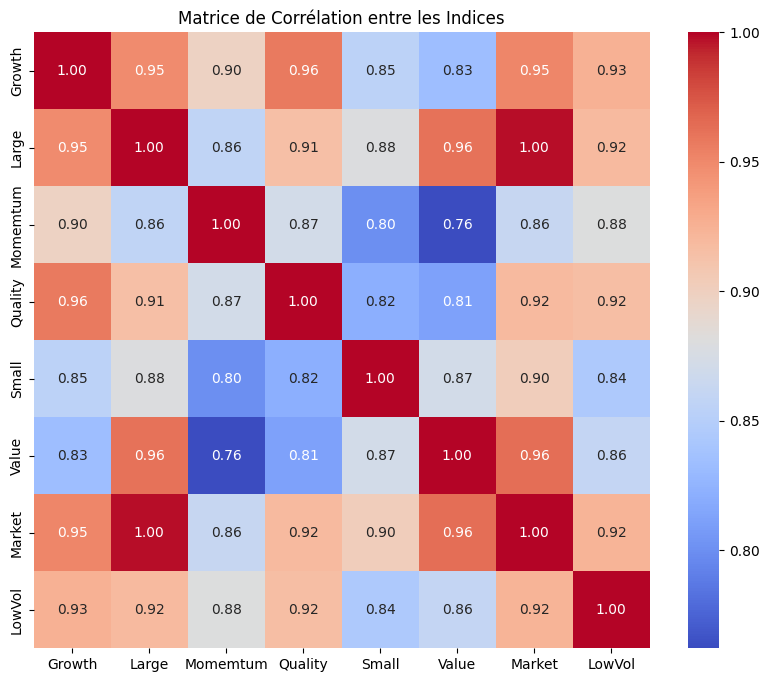

In [ ]:
# Matrice de corrélation entre les indices (version basique)

# Calculer la matrice de corrélation entre les indices
all_returns = pd.DataFrame()

for key, data in filtered_data.items():
    # Ajouter les rendements de chaque indice à un DataFrame commun
    all_returns[key] = data['% Change']

# Calculer la matrice de corrélation
correlation_matrix = all_returns.corr()

# Visualiser la matrice de corrélation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title("Matrice de Corrélation entre les Indices")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\150627551.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.95***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\150627551.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.90***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\150627551.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.96***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_valu

Matrice de corrélation avec différents niveaux de significativité :
           Growth    Large Momemtum  Quality    Small    Value   Market  \
Growth        1.0  0.95***  0.90***  0.96***  0.85***  0.83***  0.95***   
Large     0.95***      1.0  0.86***  0.91***  0.88***  0.96***  1.00***   
Momemtum  0.90***  0.86***      1.0  0.87***  0.80***  0.76***  0.86***   
Quality   0.96***  0.91***  0.87***      1.0  0.82***  0.81***  0.92***   
Small     0.85***  0.88***  0.80***  0.82***      1.0  0.87***  0.90***   
Value     0.83***  0.96***  0.76***  0.81***  0.87***      1.0  0.96***   
Market    0.95***  1.00***  0.86***  0.92***  0.90***  0.96***      1.0   
LowVol    0.93***  0.92***  0.88***  0.92***  0.84***  0.86***  0.92***   

           LowVol  
Growth    0.93***  
Large     0.92***  
Momemtum  0.88***  
Quality   0.92***  
Small     0.84***  
Value     0.86***  
Market    0.92***  
LowVol        1.0  


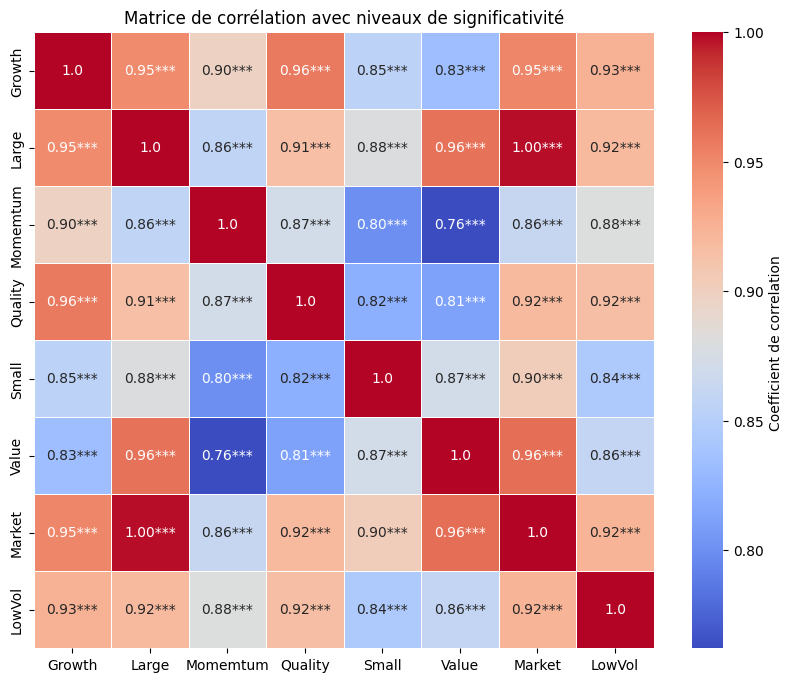

Les résultats ont été exportés vers matrice_correlation_avec_significativite.csv


In [ ]:
# Matrice de corrélation avec niveaux de significativité

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que filtered_data soit déjà défini et contient vos données filtrées

# Calculer la matrice de corrélation entre les indices
all_returns = pd.DataFrame()

for key, data in filtered_data.items():
    # Ajouter les rendements de chaque indice à un DataFrame commun
    all_returns[key] = data['% Change']

# Calculer la matrice de corrélation
correlation_matrix = all_returns.corr()

# Calculer les matrices de significativité pour différents niveaux
n = len(all_returns)
significance_levels = {
    'p<0.05': 0.05,
    'p<0.01': 0.01,
    'p<0.001': 0.001
}

significance_matrices = {level: np.zeros_like(correlation_matrix, dtype=bool) for level in significance_levels}

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j:
            r = correlation_matrix.iloc[i, j]
            t_stat = r * np.sqrt((n - 2) / (1 - r**2))
            p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 2))

            for level, threshold in significance_levels.items():
                significance_matrices[level][i, j] = p_value < threshold

# Créer un DataFrame pour afficher les résultats avec différents niveaux de significativité
significance_df = correlation_matrix.copy()
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j:
            corr_value = f"{correlation_matrix.iloc[i, j]:.2f}"
            if significance_matrices['p<0.001'][i, j]:
                corr_value += "***"
            elif significance_matrices['p<0.01'][i, j]:
                corr_value += "**"
            elif significance_matrices['p<0.05'][i, j]:
                corr_value += "*"
            significance_df.iloc[i, j] = corr_value

# Afficher le tableau de corrélation avec différents niveaux de significativité
print("Matrice de corrélation avec différents niveaux de significativité :")
print(significance_df)

# Visualiser la matrice de corrélation avec un graphique
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=significance_df.values, fmt='', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Coefficient de correlation '})
plt.title("Matrice de corrélation avec niveaux de significativité")
plt.show()

# Exporter les résultats dans un fichier CSV
csv_file_path = 'matrice_correlation_avec_significativite.csv'
significance_df.to_csv(csv_file_path)

print(f"Les résultats ont été exportés vers {csv_file_path}")



Matrice de R² avec niveaux de significativité :
           Growth    Large Momemtum  Quality    Small    Value   Market  \
Growth       1.00  0.90***  0.80***  0.92***  0.73***  0.69***  0.90***   
Large     0.90***     1.00  0.73***  0.84***  0.77***  0.92***  1.00***   
Momemtum  0.80***  0.73***     1.00  0.76***  0.64***  0.58***  0.74***   
Quality   0.92***  0.84***  0.76***     1.00  0.67***  0.66***  0.84***   
Small     0.73***  0.77***  0.64***  0.67***     1.00  0.76***  0.81***   
Value     0.69***  0.92***  0.58***  0.66***  0.76***     1.00  0.93***   
Market    0.90***  1.00***  0.74***  0.84***  0.81***  0.93***     1.00   
LowVol    0.86***  0.84***  0.78***  0.84***  0.71***  0.74***  0.85***   

           LowVol  
Growth    0.86***  
Large     0.84***  
Momemtum  0.78***  
Quality   0.84***  
Small     0.71***  
Value     0.74***  
Market    0.85***  
LowVol       1.00  


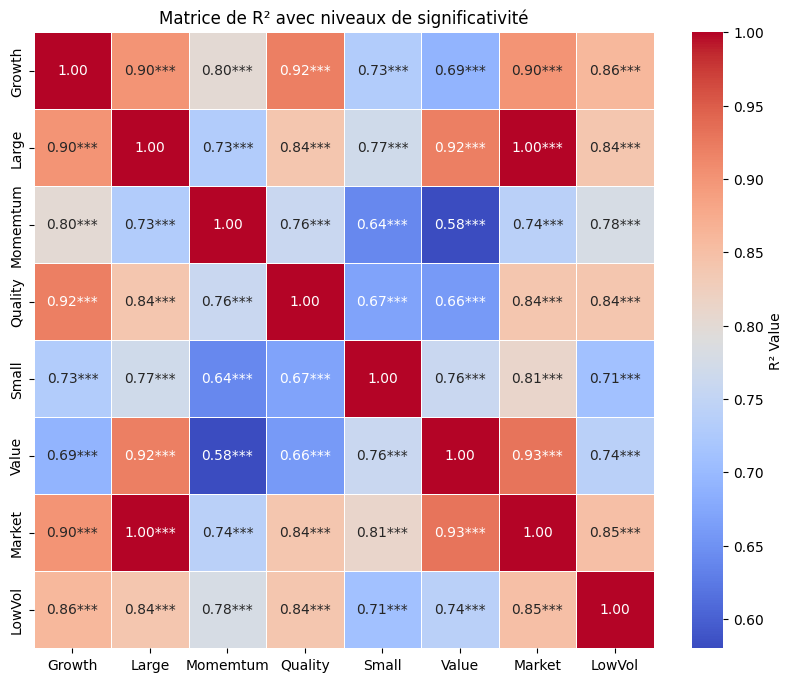

Les résultats R² ont été exportés vers R2_all_periods.csv


In [ ]:
# Matrice de R² avec niveaux de significativité

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Construire un DataFrame contenant tous les rendements
all_returns = pd.DataFrame()
for key, data in filtered_data.items():
    all_returns[key] = data['% Change']

# Calcul de la matrice de corrélation
correlation_matrix = all_returns.corr()
n = len(all_returns)

# Initialisation de la matrice de R2 avec significativité
r2_matrix = pd.DataFrame(index=correlation_matrix.index, columns=correlation_matrix.columns)

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j:
            r = correlation_matrix.iloc[i, j]
            r_squared = r ** 2
            t_stat = r * np.sqrt((n - 2) / (1 - r ** 2))
            p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 2))

            # Déterminer le niveau de significativité
            significance_marker = ""
            if p_value < 0.001:
                significance_marker = "***"
            elif p_value < 0.01:
                significance_marker = "**"
            elif p_value < 0.05:
                significance_marker = "*"

            # Formater R² avec le marqueur de significativité
            r2_matrix.iloc[i, j] = f"{r_squared:.2f}{significance_marker}"
        else:
            r2_matrix.iloc[i, j] = "1.00"  # Corrélation parfaite sur la diagonale

# Afficher la matrice R²
print("\nMatrice de R² avec niveaux de significativité :")
print(r2_matrix)

# Créer une matrice numérique pour la carte thermique
heatmap_data = r2_matrix.copy()
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        value = heatmap_data.iloc[i, j]
        if isinstance(value, str) and value.endswith(('*', '**', '***')):
            heatmap_data.iloc[i, j] = float(value[:-3])
        else:
            heatmap_data.iloc[i, j] = float(value)

# Visualiser la matrice R² avec un graphique
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float), annot=r2_matrix, fmt='s', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'R² Value'})
plt.title("Matrice de R² avec niveaux de significativité")
plt.show()

# Exporter la matrice R² dans un fichier CSV
r2_csv_path = "R2_all_periods.csv"
r2_matrix.to_csv(r2_csv_path)

print(f"Les résultats R² ont été exportés vers {r2_csv_path}")


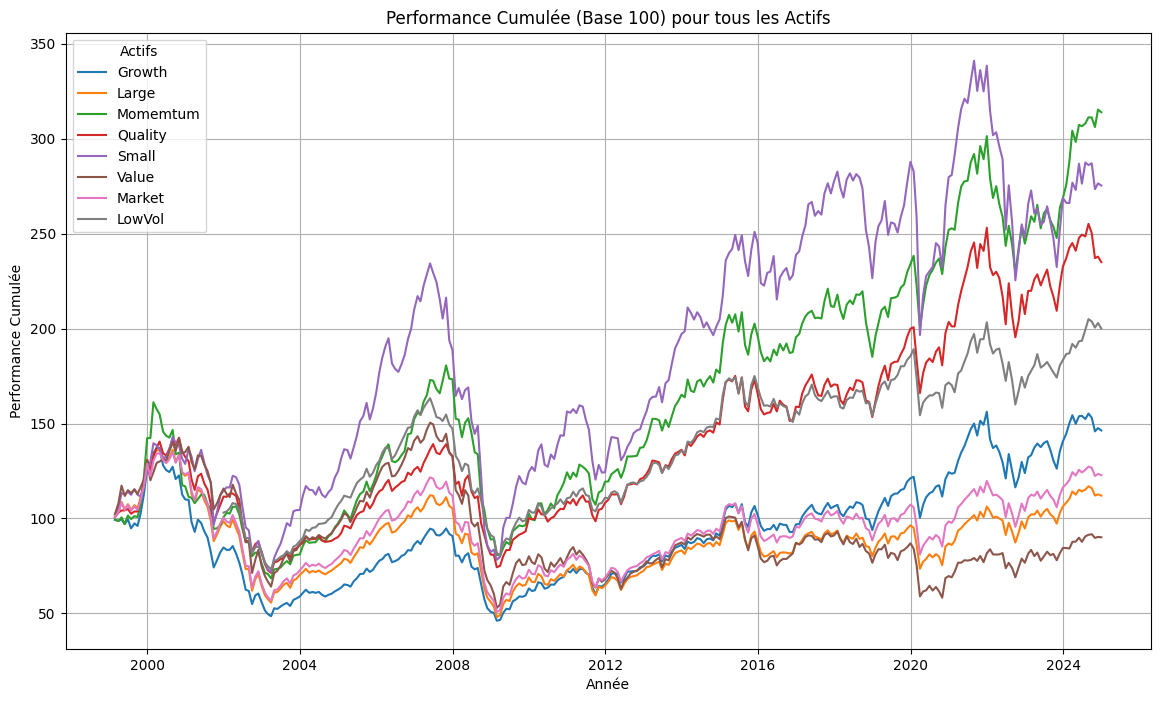

In [ ]:
# Performances cumulées 

# Tracer la performance cumulée pour tous les actifs sur le même graphique
plt.figure(figsize=(14, 8))

for key, data in filtered_data.items():
    plt.plot(data['Date'], (1 + data['Total Return']) * 100, label=key)

plt.title('Performance Cumulée (Base 100) pour tous les Actifs')
plt.xlabel('Année')
plt.ylabel('Performance Cumulée')
plt.grid(True)
plt.legend(title='Actifs')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.96***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.85***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significan

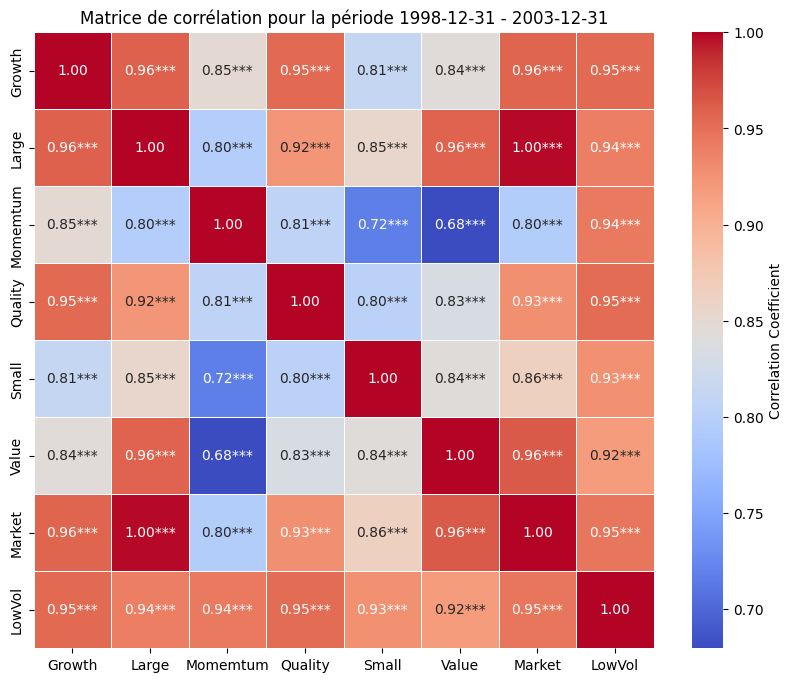

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.97***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.93***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significan

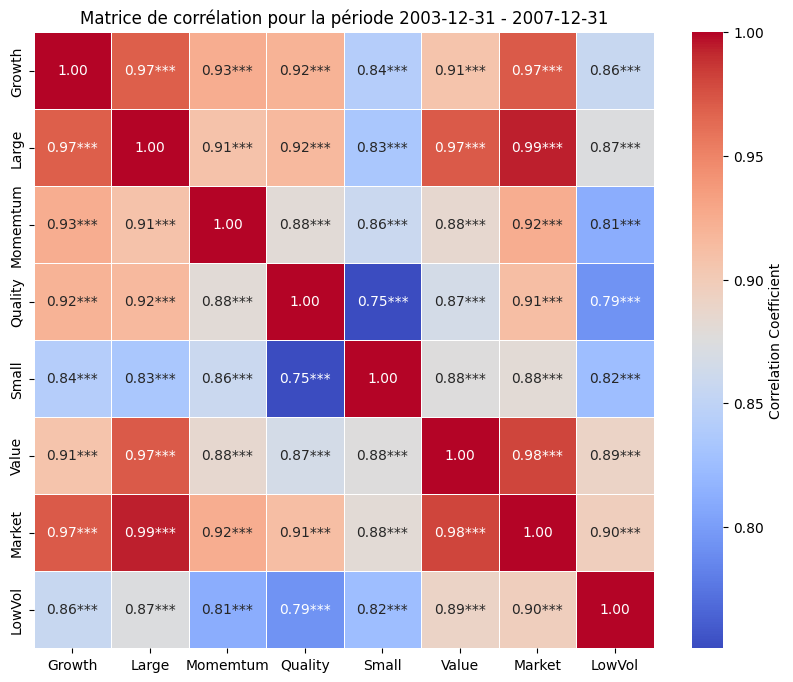

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.98***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.93***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significan

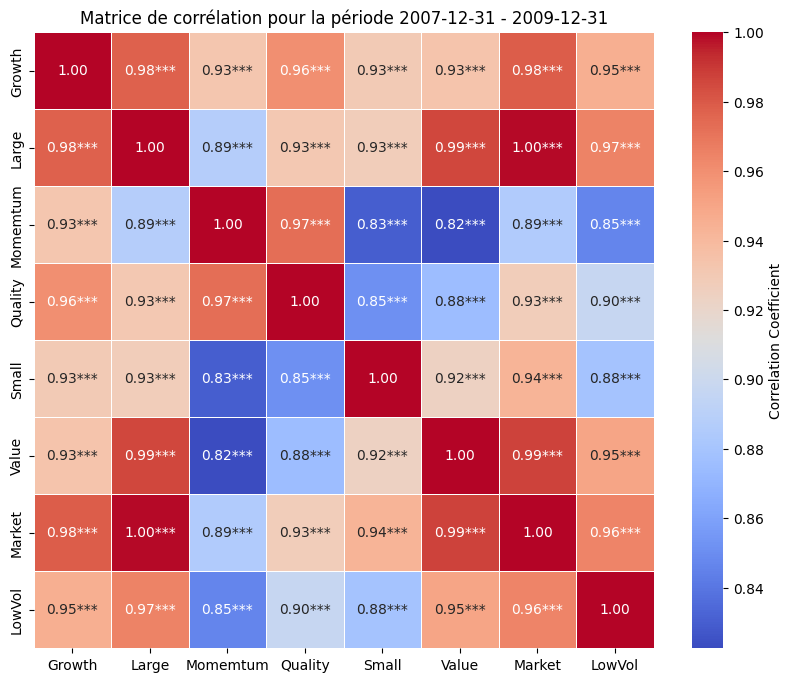

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.95***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.91***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significan

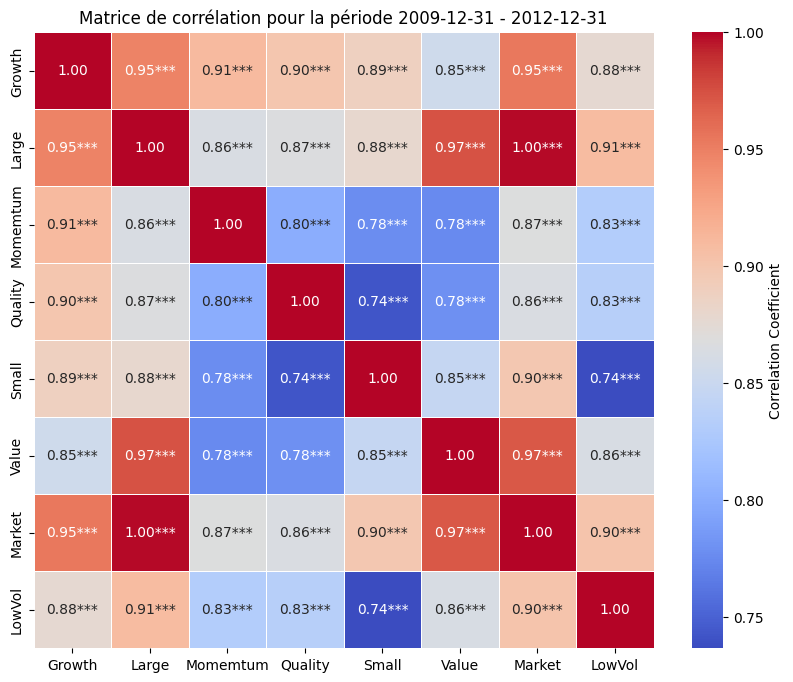

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.95***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.94***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significan

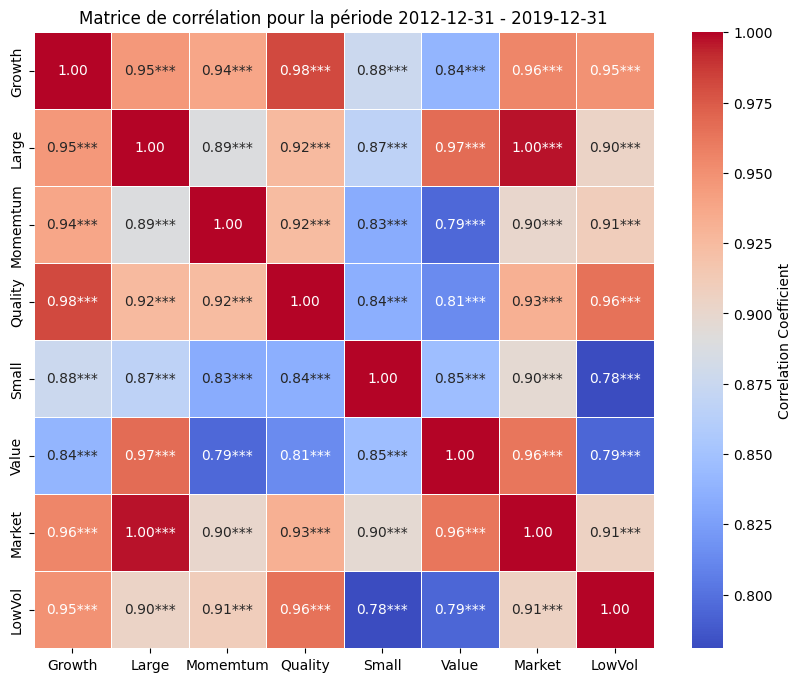

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.95***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.97***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significan

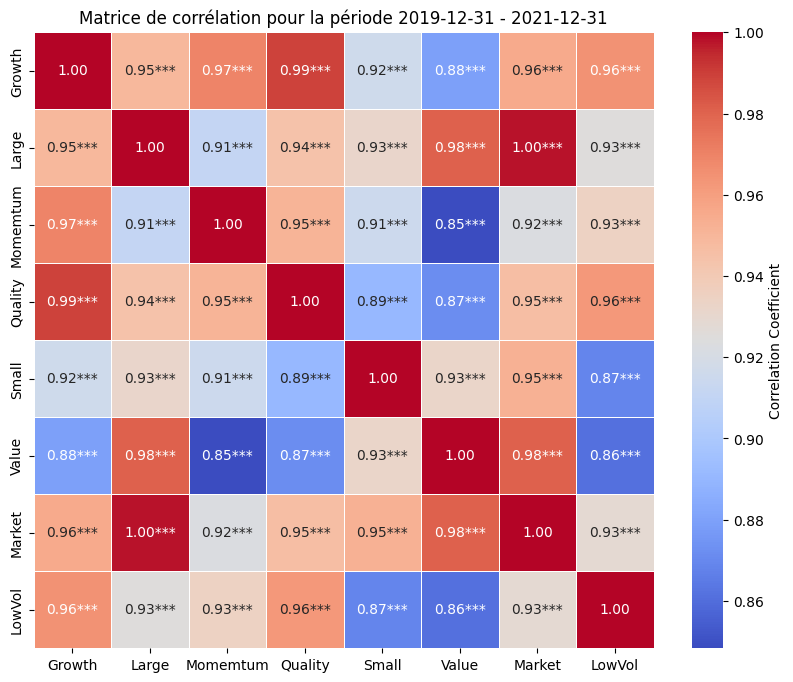

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.92***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significance_df.iloc[i, j] = corr_value
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3435630619.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.88***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  significan

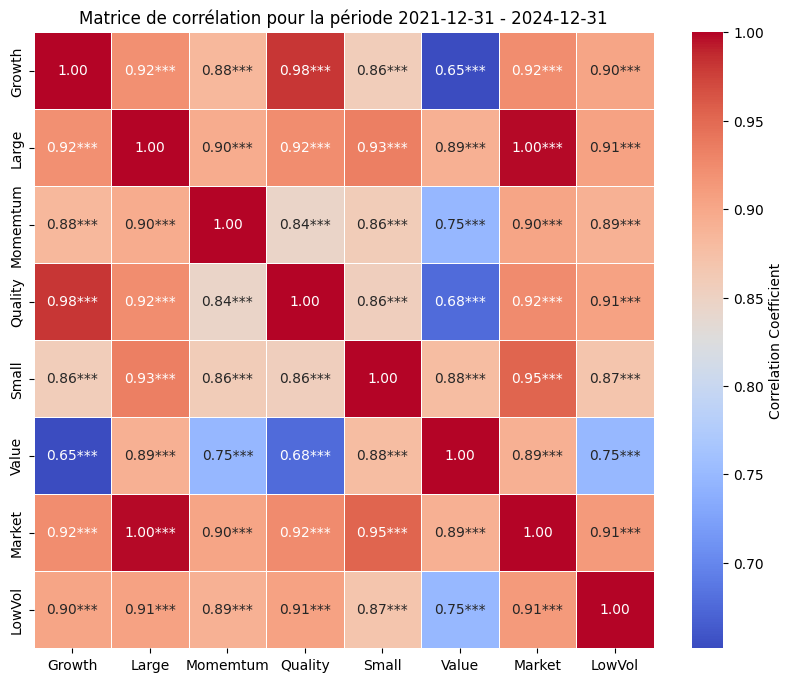

Tous les résultats ont été exportés vers correlation_matrix_per_periods.csv


In [ ]:
# Matrice de corrélation par sous période avec niveaux de significativité

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Définir les périodes d'analyse
periods = [
    ('1998-12-31', '2003-12-31'),
    ('2003-12-31', '2007-12-31'),
    ('2007-12-31', '2009-12-31'),
    ('2009-12-31', '2012-12-31'),
    ('2012-12-31', '2019-12-31'),
    ('2019-12-31', '2021-12-31'),
    ('2021-12-31', '2024-12-31')
]

# Liste pour stocker les résultats de toutes les périodes
all_results = []

# Calculer la performance et la volatilité pour chaque période et chaque indice
for start_date, end_date in periods:
    # DataFrame pour stocker les rendements de chaque indice pour la période
    period_returns = pd.DataFrame()

    for key, data in filtered_data.items():
        period_data = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]

        if not period_data.empty:
            # Ajouter les rendements de chaque indice à un DataFrame commun pour la période
            period_returns[key] = period_data['% Change']

    # Calculer la matrice de corrélation pour la période
    correlation_matrix = period_returns.corr()

    # Calculer la matrice de significativité pour différents niveaux
    n = len(period_returns)
    significance_levels = {
        'p<0.05': 0.05,
        'p<0.01': 0.01,
        'p<0.001': 0.001
    }

    significance_matrices = {level: np.zeros_like(correlation_matrix, dtype=bool) for level in significance_levels}

    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            if i != j:
                r = correlation_matrix.iloc[i, j]
                t_stat = r * np.sqrt((n - 2) / (1 - r**2))
                p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 2))

                for level, threshold in significance_levels.items():
                    significance_matrices[level][i, j] = p_value < threshold

    # Créer un DataFrame pour afficher les résultats avec différents niveaux de significativité
    significance_df = correlation_matrix.copy()
    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            if i != j:
                corr_value = f"{correlation_matrix.iloc[i, j]:.2f}"
                if significance_matrices['p<0.001'][i, j]:
                    corr_value += "***"
                elif significance_matrices['p<0.01'][i, j]:
                    corr_value += "**"
                elif significance_matrices['p<0.05'][i, j]:
                    corr_value += "*"
                significance_df.iloc[i, j] = corr_value
            else:
                significance_df.iloc[i, j] = f"{correlation_matrix.iloc[i, j]:.2f}"

    # Visualiser la matrice de corrélation avec un graphique
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=significance_df.values, fmt='', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title(f"Matrice de corrélation pour la période {start_date} - {end_date}")
    plt.show()

    # Ajouter la période comme une ligne dans le DataFrame
    period_df = significance_df.copy()
    period_df['Period'] = f"{start_date} to {end_date}"
    all_results.append(period_df)

# Concaténer tous les DataFrames en un seul
combined_results_df = pd.concat(all_results, axis=0)

# Exporter les résultats dans un fichier CSV unique
csv_file_path = 'correlation_matrix_per_periods.csv'
combined_results_df.to_csv(csv_file_path)

print(f"Tous les résultats ont été exportés vers {csv_file_path}")


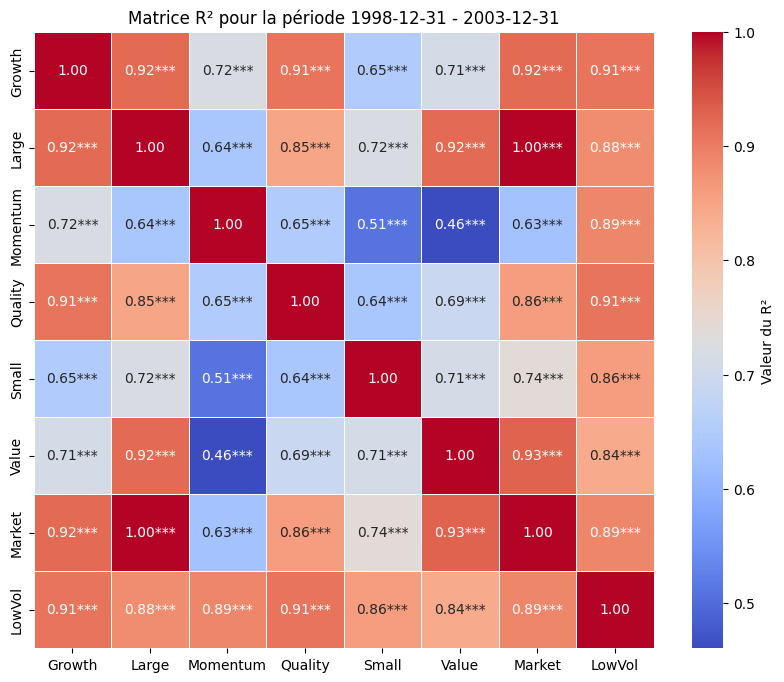

Matrice R² pour la période 1998-12-31 - 2003-12-31 :
           Growth    Large Momentum  Quality    Small    Value   Market  \
Growth       1.00  0.92***  0.72***  0.91***  0.65***  0.71***  0.92***   
Large     0.92***     1.00  0.64***  0.85***  0.72***  0.92***  1.00***   
Momentum  0.72***  0.64***     1.00  0.65***  0.51***  0.46***  0.63***   
Quality   0.91***  0.85***  0.65***     1.00  0.64***  0.69***  0.86***   
Small     0.65***  0.72***  0.51***  0.64***     1.00  0.71***  0.74***   
Value     0.71***  0.92***  0.46***  0.69***  0.71***     1.00  0.93***   
Market    0.92***  1.00***  0.63***  0.86***  0.74***  0.93***     1.00   
LowVol    0.91***  0.88***  0.89***  0.91***  0.86***  0.84***  0.89***   

           LowVol                    Period  
Growth    0.91***  1998-12-31 to 2003-12-31  
Large     0.88***  1998-12-31 to 2003-12-31  
Momentum  0.89***  1998-12-31 to 2003-12-31  
Quality   0.91***  1998-12-31 to 2003-12-31  
Small     0.86***  1998-12-31 to 2003-12-

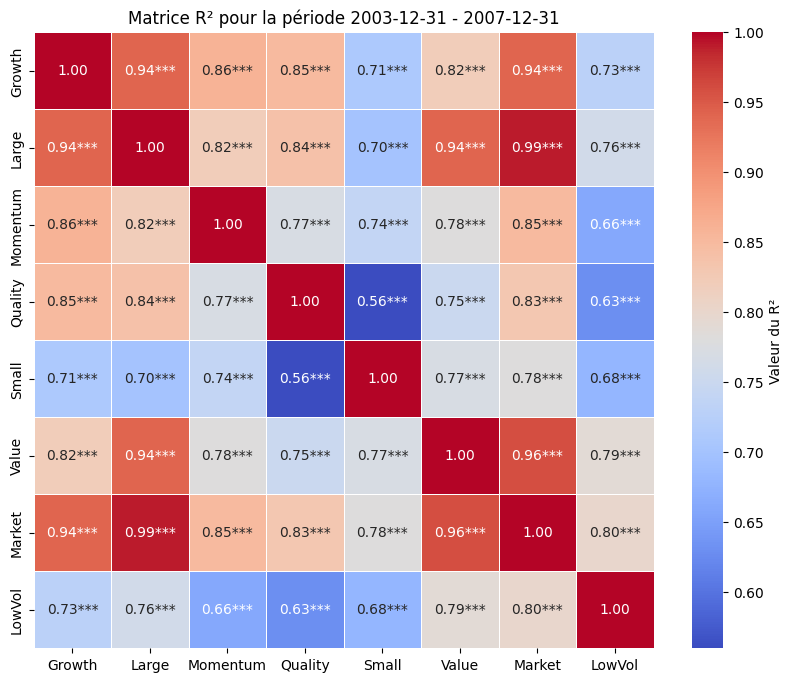

Matrice R² pour la période 2003-12-31 - 2007-12-31 :
           Growth    Large Momentum  Quality    Small    Value   Market  \
Growth       1.00  0.94***  0.86***  0.85***  0.71***  0.82***  0.94***   
Large     0.94***     1.00  0.82***  0.84***  0.70***  0.94***  0.99***   
Momentum  0.86***  0.82***     1.00  0.77***  0.74***  0.78***  0.85***   
Quality   0.85***  0.84***  0.77***     1.00  0.56***  0.75***  0.83***   
Small     0.71***  0.70***  0.74***  0.56***     1.00  0.77***  0.78***   
Value     0.82***  0.94***  0.78***  0.75***  0.77***     1.00  0.96***   
Market    0.94***  0.99***  0.85***  0.83***  0.78***  0.96***     1.00   
LowVol    0.73***  0.76***  0.66***  0.63***  0.68***  0.79***  0.80***   

           LowVol                    Period  
Growth    0.73***  2003-12-31 to 2007-12-31  
Large     0.76***  2003-12-31 to 2007-12-31  
Momentum  0.66***  2003-12-31 to 2007-12-31  
Quality   0.63***  2003-12-31 to 2007-12-31  
Small     0.68***  2003-12-31 to 2007-12-

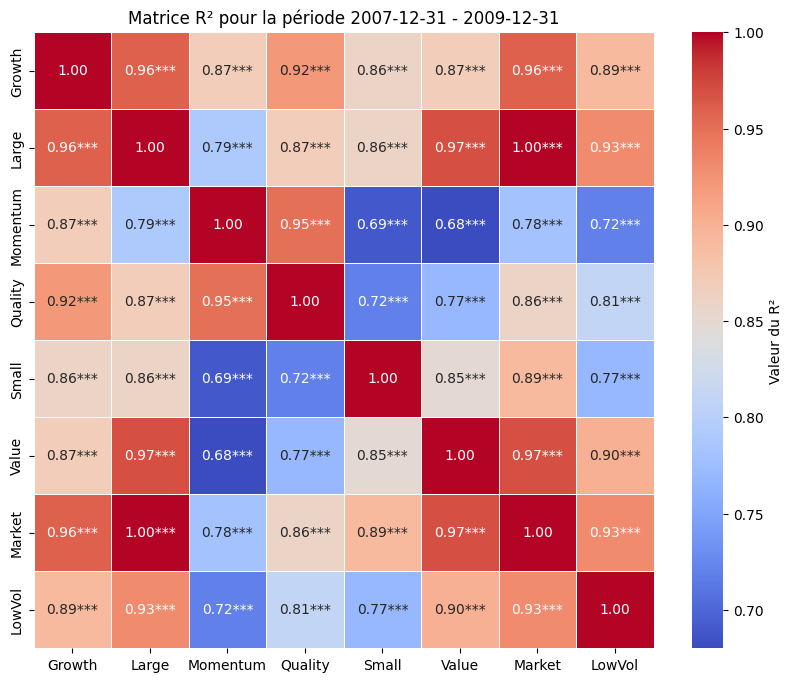

Matrice R² pour la période 2007-12-31 - 2009-12-31 :
           Growth    Large Momentum  Quality    Small    Value   Market  \
Growth       1.00  0.96***  0.87***  0.92***  0.86***  0.87***  0.96***   
Large     0.96***     1.00  0.79***  0.87***  0.86***  0.97***  1.00***   
Momentum  0.87***  0.79***     1.00  0.95***  0.69***  0.68***  0.78***   
Quality   0.92***  0.87***  0.95***     1.00  0.72***  0.77***  0.86***   
Small     0.86***  0.86***  0.69***  0.72***     1.00  0.85***  0.89***   
Value     0.87***  0.97***  0.68***  0.77***  0.85***     1.00  0.97***   
Market    0.96***  1.00***  0.78***  0.86***  0.89***  0.97***     1.00   
LowVol    0.89***  0.93***  0.72***  0.81***  0.77***  0.90***  0.93***   

           LowVol                    Period  
Growth    0.89***  2007-12-31 to 2009-12-31  
Large     0.93***  2007-12-31 to 2009-12-31  
Momentum  0.72***  2007-12-31 to 2009-12-31  
Quality   0.81***  2007-12-31 to 2009-12-31  
Small     0.77***  2007-12-31 to 2009-12-

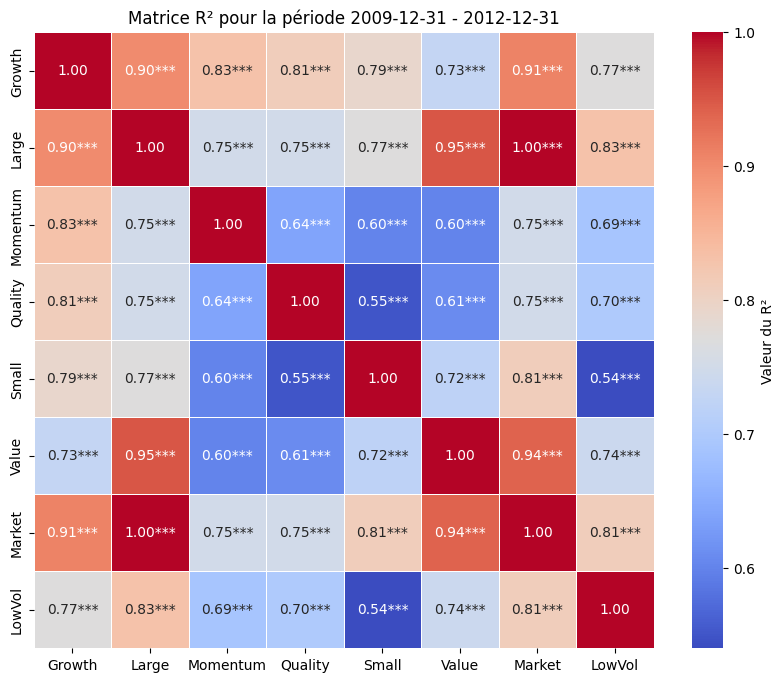

Matrice R² pour la période 2009-12-31 - 2012-12-31 :
           Growth    Large Momentum  Quality    Small    Value   Market  \
Growth       1.00  0.90***  0.83***  0.81***  0.79***  0.73***  0.91***   
Large     0.90***     1.00  0.75***  0.75***  0.77***  0.95***  1.00***   
Momentum  0.83***  0.75***     1.00  0.64***  0.60***  0.60***  0.75***   
Quality   0.81***  0.75***  0.64***     1.00  0.55***  0.61***  0.75***   
Small     0.79***  0.77***  0.60***  0.55***     1.00  0.72***  0.81***   
Value     0.73***  0.95***  0.60***  0.61***  0.72***     1.00  0.94***   
Market    0.91***  1.00***  0.75***  0.75***  0.81***  0.94***     1.00   
LowVol    0.77***  0.83***  0.69***  0.70***  0.54***  0.74***  0.81***   

           LowVol                    Period  
Growth    0.77***  2009-12-31 to 2012-12-31  
Large     0.83***  2009-12-31 to 2012-12-31  
Momentum  0.69***  2009-12-31 to 2012-12-31  
Quality   0.70***  2009-12-31 to 2012-12-31  
Small     0.54***  2009-12-31 to 2012-12-

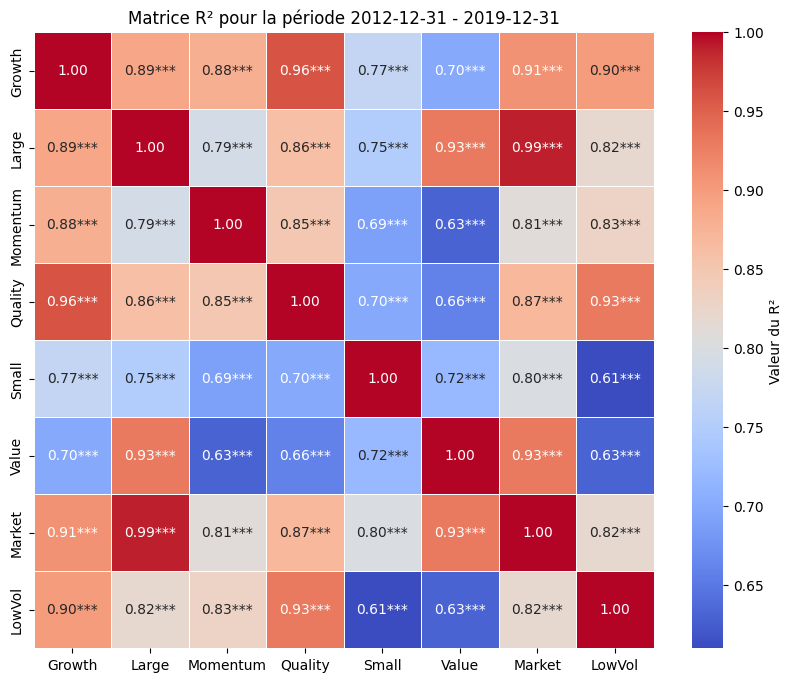

Matrice R² pour la période 2012-12-31 - 2019-12-31 :
           Growth    Large Momentum  Quality    Small    Value   Market  \
Growth       1.00  0.89***  0.88***  0.96***  0.77***  0.70***  0.91***   
Large     0.89***     1.00  0.79***  0.86***  0.75***  0.93***  0.99***   
Momentum  0.88***  0.79***     1.00  0.85***  0.69***  0.63***  0.81***   
Quality   0.96***  0.86***  0.85***     1.00  0.70***  0.66***  0.87***   
Small     0.77***  0.75***  0.69***  0.70***     1.00  0.72***  0.80***   
Value     0.70***  0.93***  0.63***  0.66***  0.72***     1.00  0.93***   
Market    0.91***  0.99***  0.81***  0.87***  0.80***  0.93***     1.00   
LowVol    0.90***  0.82***  0.83***  0.93***  0.61***  0.63***  0.82***   

           LowVol                    Period  
Growth    0.90***  2012-12-31 to 2019-12-31  
Large     0.82***  2012-12-31 to 2019-12-31  
Momentum  0.83***  2012-12-31 to 2019-12-31  
Quality   0.93***  2012-12-31 to 2019-12-31  
Small     0.61***  2012-12-31 to 2019-12-

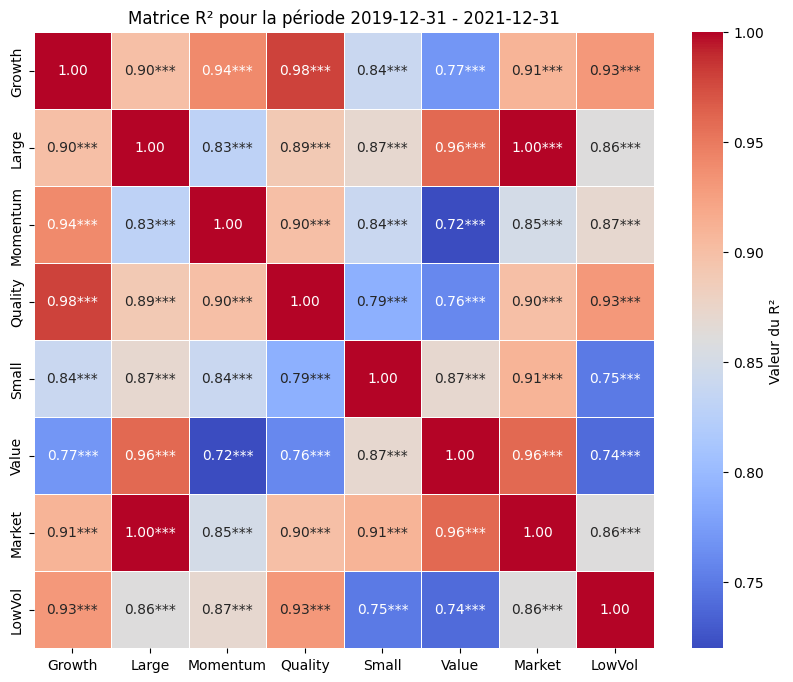

Matrice R² pour la période 2019-12-31 - 2021-12-31 :
           Growth    Large Momentum  Quality    Small    Value   Market  \
Growth       1.00  0.90***  0.94***  0.98***  0.84***  0.77***  0.91***   
Large     0.90***     1.00  0.83***  0.89***  0.87***  0.96***  1.00***   
Momentum  0.94***  0.83***     1.00  0.90***  0.84***  0.72***  0.85***   
Quality   0.98***  0.89***  0.90***     1.00  0.79***  0.76***  0.90***   
Small     0.84***  0.87***  0.84***  0.79***     1.00  0.87***  0.91***   
Value     0.77***  0.96***  0.72***  0.76***  0.87***     1.00  0.96***   
Market    0.91***  1.00***  0.85***  0.90***  0.91***  0.96***     1.00   
LowVol    0.93***  0.86***  0.87***  0.93***  0.75***  0.74***  0.86***   

           LowVol                    Period  
Growth    0.93***  2019-12-31 to 2021-12-31  
Large     0.86***  2019-12-31 to 2021-12-31  
Momentum  0.87***  2019-12-31 to 2021-12-31  
Quality   0.93***  2019-12-31 to 2021-12-31  
Small     0.75***  2019-12-31 to 2021-12-

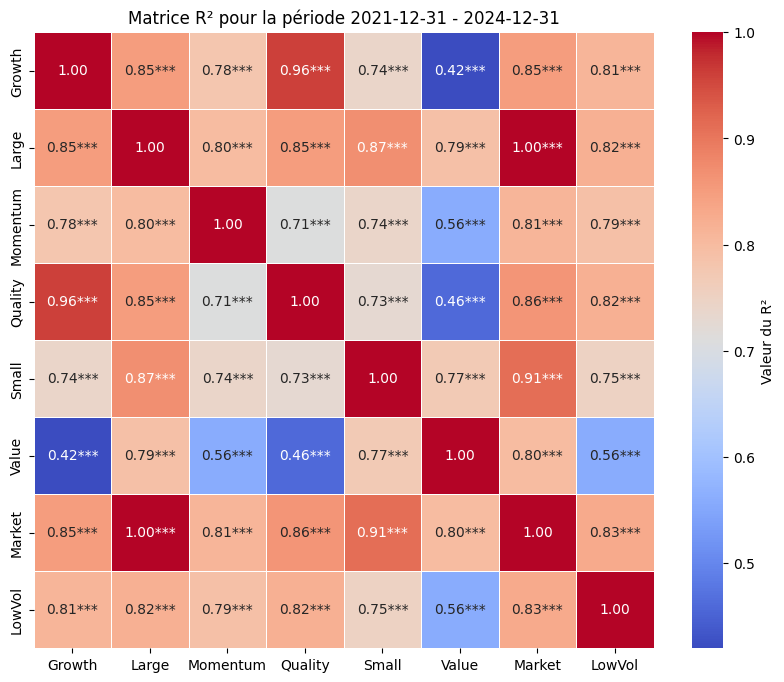

Matrice R² pour la période 2021-12-31 - 2024-12-31 :
           Growth    Large Momentum  Quality    Small    Value   Market  \
Growth       1.00  0.85***  0.78***  0.96***  0.74***  0.42***  0.85***   
Large     0.85***     1.00  0.80***  0.85***  0.87***  0.79***  1.00***   
Momentum  0.78***  0.80***     1.00  0.71***  0.74***  0.56***  0.81***   
Quality   0.96***  0.85***  0.71***     1.00  0.73***  0.46***  0.86***   
Small     0.74***  0.87***  0.74***  0.73***     1.00  0.77***  0.91***   
Value     0.42***  0.79***  0.56***  0.46***  0.77***     1.00  0.80***   
Market    0.85***  1.00***  0.81***  0.86***  0.91***  0.80***     1.00   
LowVol    0.81***  0.82***  0.79***  0.82***  0.75***  0.56***  0.83***   

           LowVol                    Period  
Growth    0.81***  2021-12-31 to 2024-12-31  
Large     0.82***  2021-12-31 to 2024-12-31  
Momentum  0.79***  2021-12-31 to 2024-12-31  
Quality   0.82***  2021-12-31 to 2024-12-31  
Small     0.75***  2021-12-31 to 2024-12-

In [ ]:
# Matrice de R² par sous-période avec niveaux de significativité

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Définir les périodes d'analyse
periods = [
    ('1998-12-31', '2003-12-31'),
    ('2003-12-31', '2007-12-31'),
    ('2007-12-31', '2009-12-31'),
    ('2009-12-31', '2012-12-31'),
    ('2012-12-31', '2019-12-31'),
    ('2019-12-31', '2021-12-31'),
    ('2021-12-31', '2024-12-31')
]

# Liste pour stocker les matrices R2 annotées pour chaque période
all_r2_results = []

for (start_date, end_date) in periods:
    # DataFrame pour stocker les rendements par indice pour cette période
    period_returns = pd.DataFrame()

    for key, data in filtered_data.items():
        period_data = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]
        if not period_data.empty:
            period_returns[key] = period_data['% Change']

    # Vérifier qu'on a assez de données pour cette période
    if period_returns.shape[0] < 3:
        print(f"Période insuffisante ({start_date} - {end_date}), ignorée.")
        continue

    # Calcul de la matrice de corrélation
    correlation_matrix = period_returns.corr()
    n = len(period_returns)

    # Niveaux de significativité
    significance_levels = {
        'p<0.05': 0.05,
        'p<0.01': 0.01,
        'p<0.001': 0.001
    }

    # Initialisation du DataFrame R2
    r2_matrix = pd.DataFrame(index=correlation_matrix.index, columns=correlation_matrix.columns)

    # Calcul du R² et de la significativité
    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            if i != j:
                r = correlation_matrix.iloc[i, j]
                r_squared = r ** 2
                t_stat = r * np.sqrt((n - 2) / (1 - r ** 2))
                p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 2))

                # Ajouter niveau de significativité
                significance_marker = ""
                if p_value < 0.001:
                    significance_marker = "***"
                elif p_value < 0.01:
                    significance_marker = "**"
                elif p_value < 0.05:
                    significance_marker = "*"

                r2_matrix.iloc[i, j] = f"{r_squared:.2f}{significance_marker}"
            else:
                r2_matrix.iloc[i, j] = "1.00"

    # Visualiser la matrice R² avec un graphique
    plt.figure(figsize=(10, 8))
    heatmap_data = r2_matrix.copy()
    for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            value = heatmap_data.iloc[i, j]
            if isinstance(value, str) and value.endswith(('*', '**', '***')):
                heatmap_data.iloc[i, j] = float(value[:-3])
            else:
                heatmap_data.iloc[i, j] = float(value)

    sns.heatmap(heatmap_data.astype(float), annot=r2_matrix.values, fmt='s', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Valeur du R²'})
    plt.title(f"Matrice R² pour la période {start_date} - {end_date}")
    plt.show()

    # Ajouter la période à chaque ligne
    r2_matrix['Period'] = f"{start_date} to {end_date}"
    all_r2_results.append(r2_matrix)

    # Affichage dans le notebook (facultatif)
    print(f"Matrice R² pour la période {start_date} - {end_date} :")
    print(r2_matrix)
    print("\n")

# Concaténation de toutes les matrices
combined_r2_df = pd.concat(all_r2_results, axis=0)

# Export en CSV
csv_r2_path = 'R2_per_sous_periodes.csv'
combined_r2_df.to_csv(csv_r2_path, index=False)

print(f"Tous les résultats R² par sous-période ont été exportés vers {csv_r2_path}")


In [ ]:
# Rentabilité, volatilité et Maximum Drawdown par sous-période

# Définir les périodes d'analyse
periods = [
    ('1998-12-31', '2003-12-31'),
    ('2003-12-31', '2007-12-31'),
    ('2007-12-31', '2009-12-31'),
    ('2009-12-31' , '2012-12-31'),
    ('2012-12-31', '2019-12-31'),
    ('2019-12-31', '2021-12-31'),
    ('2021-12-31', '2024-12-31')
]

# Dictionnaire pour stocker les résultats
sequential_results = {period: {} for period in periods}

# Calculer la performance et la volatilité pour chaque période et chaque indice
for key, data in filtered_data.items():
    for (start_date, end_date) in periods:
        period_data = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]

        if not period_data.empty:
            # Rebase the performance to 100 at the start of each period
            period_data['Cumulative Return'] = (1 + period_data['% Change']).cumprod() * 100

            # Calculer le rendement mensuel moyen
            monthly_return = period_data['% Change'].mean()

            # Calculer le rendement annualisé
            annualized_return = (1 + monthly_return)**12 - 1

            # Calculer la volatilité annualisée
            volatility = period_data['% Change'].std() * np.sqrt(12)

            # Calculer le Maximum Drawdown en termes de prix puis en pourcentage pour chaque indice
            period_data['Cumulative Peak Price'] = period_data['Price'].cummax()
            period_data['Drawdown Price'] = period_data['Price'] - period_data['Cumulative Peak Price']
            max_drawdown_price = period_data['Drawdown Price'].min()
            max_drawdown_percentage = (max_drawdown_price / period_data.loc[period_data['Drawdown Price'].idxmin(), 'Cumulative Peak Price']) * 100

            # Stocker les résultats pour chaque indice
            sequential_results[(start_date, end_date)][key] = {
                'Annualized Return': annualized_return,
                'Annualized Volatility': volatility,
                'Max Drawdown': max_drawdown_percentage
            }

# Afficher les résultats pour chaque période
for (start_date, end_date), results in sequential_results.items():
    print(f"Résultats pour la période {start_date} - {end_date} :")
    results_df = pd.DataFrame(results).transpose()
    print(results_df, "\n")


Résultats pour la période 1998-12-31 - 2003-12-31 :
          Annualized Return  Annualized Volatility  Max Drawdown
Growth            -0.085615               0.190150    -62.282496
Large             -0.051654               0.190987    -56.373455
Momentum          -0.026099               0.182919    -55.741827
Quality           -0.018361               0.155701    -48.056322
Small              0.028187               0.193500    -46.298784
Value             -0.008943               0.201143    -51.639999
Market            -0.046046               0.187891    -55.298364
LowVol            -0.050191               0.137227    -31.076961 

Résultats pour la période 2003-12-31 - 2007-12-31 :
          Annualized Return  Annualized Volatility  Max Drawdown
Growth             0.117078               0.076543     -5.230700
Large              0.109223               0.078329     -5.982745
Momentum           0.214984               0.100186     -6.580209
Quality            0.117711               0.07520

C:\Users\wilso\AppData\Local\Temp\ipykernel_1472\1659622559.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['Cumulative Return'] = (1 + period_data['% Change']).cumprod() * 100
C:\Users\wilso\AppData\Local\Temp\ipykernel_1472\1659622559.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['Cumulative Peak Price'] = period_data['Price'].cummax()
C:\Users\wilso\AppData\Local\Temp\ipykernel_1472\1659622559.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
# Bêta par sous-période avec niveaux de significativité

import pandas as pd
import numpy as np
from scipy.stats import linregress

# Dictionnaire pour stocker les résultats de bêta et de significativité
beta_results = {period: {} for period in periods}

# Calculer le bêta pour chaque indice par rapport à l'indice de marché pour chaque période
market_data = filtered_data['Market']

# Liste pour stocker les résultats de toutes les périodes
all_beta_results = []

for (start_date, end_date) in periods:
    market_period_data = market_data[(market_data['Date'] > start_date) & (market_data['Date'] <= end_date)]

    for key, data in filtered_data.items():
        if key != 'Market':
            period_data = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]

            if not period_data.empty and not market_period_data.empty:
                # Calculer le '% Change' basé sur le logarithme naturel des prix
                period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
                market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))

                # Aligner les données avec celles de l'indice de marché
                merged_data = pd.merge(period_data[['Date', '% Change']], market_period_data[['Date', '% Change']], on='Date', suffixes=('', '_Market'))

                # Supprimer les valeurs manquantes
                merged_data = merged_data.dropna(subset=['% Change', '% Change_Market'])

                # Vérifier s'il reste des données après suppression des valeurs manquantes
                if not merged_data.empty:
                    # Calculer le bêta en utilisant la régression linéaire
                    slope, intercept, r_value, p_value, std_err = linregress(merged_data['% Change_Market'], merged_data['% Change'])
                    beta_results[(start_date, end_date)][key] = {
                        'Beta': slope,
                        'P-Value': p_value,
                        'Significance': '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''
                    }
                else:
                    beta_results[(start_date, end_date)][key] = {
                        'Beta': None,
                        'P-Value': None,
                        'Significance': ''
                    }

    # Créer un DataFrame pour les bêtas de la période actuelle
    beta_df = pd.DataFrame(beta_results[(start_date, end_date)]).T
    beta_df['Period'] = f"{start_date} to {end_date}"
    all_beta_results.append(beta_df)

    # Afficher les résultats de bêta pour la période actuelle
    print(f"Bêtas pour la période {start_date} - {end_date} :")
    display(beta_df)
    print("\n")

# Concaténer tous les DataFrames en un seul
combined_beta_results_df = pd.concat(all_beta_results, axis=0)

# Exporter les résultats dans un fichier CSV unique
csv_file_path = 'all_periods_beta_results.csv'
combined_beta_results_df.to_csv(csv_file_path)

print(f"Tous les résultats de bêta ont été exportés vers {csv_file_path}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

Bêtas pour la période 1998-12-31 - 2003-12-31 :


,Beta,P-Value,Significance,Period
Growth,0.968471,0.0,***,1998-12-31 to 2003-12-31
Large,1.01502,0.0,***,1998-12-31 to 2003-12-31
Momentum,0.77254,0.0,***,1998-12-31 to 2003-12-31
Quality,0.782851,0.0,***,1998-12-31 to 2003-12-31
Small,0.890062,0.0,***,1998-12-31 to 2003-12-31
Value,1.03107,0.0,***,1998-12-31 to 2003-12-31
LowVol,0.600797,0.0,***,1998-12-31 to 2003-12-31




Bêtas pour la période 2003-12-31 - 2007-12-31 :


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

,Beta,P-Value,Significance,Period
Growth,0.890102,0.0,***,2003-12-31 to 2007-12-31
Large,0.94043,0.0,***,2003-12-31 to 2007-12-31
Momentum,1.103081,0.0,***,2003-12-31 to 2007-12-31
Quality,0.834792,0.0,***,2003-12-31 to 2007-12-31
Small,1.402559,0.0,***,2003-12-31 to 2007-12-31
Value,1.111159,0.0,***,2003-12-31 to 2007-12-31
LowVol,0.806111,0.0,***,2003-12-31 to 2007-12-31


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

Bêtas pour la période 2007-12-31 - 2009-12-31 :


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

,Beta,P-Value,Significance,Period
Growth,0.841122,0.0,***,2007-12-31 to 2009-12-31
Large,0.974178,0.0,***,2007-12-31 to 2009-12-31
Momentum,0.769969,0.0,***,2007-12-31 to 2009-12-31
Quality,0.748304,0.0,***,2007-12-31 to 2009-12-31
Small,1.235769,0.0,***,2007-12-31 to 2009-12-31
Value,1.168327,0.0,***,2007-12-31 to 2009-12-31
LowVol,0.697369,0.0,***,2007-12-31 to 2009-12-31


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 



Bêtas pour la période 2009-12-31 - 2012-12-31 :


,Beta,P-Value,Significance,Period
Growth,0.87175,0.0,***,2009-12-31 to 2012-12-31
Large,0.992366,0.0,***,2009-12-31 to 2012-12-31
Momentum,0.809759,0.0,***,2009-12-31 to 2012-12-31
Quality,0.665791,0.0,***,2009-12-31 to 2012-12-31
Small,1.103433,0.0,***,2009-12-31 to 2012-12-31
Value,1.135921,0.0,***,2009-12-31 to 2012-12-31
LowVol,0.562816,0.0,***,2009-12-31 to 2012-12-31


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

Bêtas pour la période 2012-12-31 - 2019-12-31 :


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

,Beta,P-Value,Significance,Period
Growth,0.936936,0.0,***,2012-12-31 to 2019-12-31
Large,0.9996,0.0,***,2012-12-31 to 2019-12-31
Momentum,0.869986,0.0,***,2012-12-31 to 2019-12-31
Quality,0.899582,0.0,***,2012-12-31 to 2019-12-31
Small,0.992204,0.0,***,2012-12-31 to 2019-12-31
Value,1.065771,0.0,***,2012-12-31 to 2019-12-31
LowVol,0.739153,0.0,***,2012-12-31 to 2019-12-31


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

Bêtas pour la période 2019-12-31 - 2021-12-31 :


,Beta,P-Value,Significance,Period
Growth,0.768074,0.0,***,2019-12-31 to 2021-12-31
Large,0.979612,0.0,***,2019-12-31 to 2021-12-31
Momentum,0.6804,0.0,***,2019-12-31 to 2021-12-31
Quality,0.785509,0.0,***,2019-12-31 to 2021-12-31
Small,1.231998,0.0,***,2019-12-31 to 2021-12-31
Value,1.247425,0.0,***,2019-12-31 to 2021-12-31
LowVol,0.723958,0.0,***,2019-12-31 to 2021-12-31


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 



Bêtas pour la période 2021-12-31 - 2024-12-31 :


C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['% Change'] = np.log(period_data['Price'] / period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_period_data['% Change'] = np.log(market_period_data['Price'] / market_period_data['Price'].shift(1))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11996\2794700756.py:23: SettingWithCopyWarning: 

,Beta,P-Value,Significance,Period
Growth,1.062232,0.0,***,2021-12-31 to 2024-12-31
Large,0.957689,0.0,***,2021-12-31 to 2024-12-31
Momentum,0.827113,0.0,***,2021-12-31 to 2024-12-31
Quality,1.039733,0.0,***,2021-12-31 to 2024-12-31
Small,1.324818,0.0,***,2021-12-31 to 2024-12-31
Value,0.937166,0.0,***,2021-12-31 to 2024-12-31
LowVol,0.751012,0.0,***,2021-12-31 to 2024-12-31




Tous les résultats de bêta ont été exportés vers all_periods_beta_results.csv


In [ ]:
# Regression linéaire multiple avec Fama French pour chaque indice sur toute la période

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Charger les données de Fama French
fama_french_data = pd.read_csv('Europe_5_Factors_v2.csv', delimiter=';')
fama_french_data['Date'] = pd.to_datetime(fama_french_data['Date'], format='%m/%d/%y')

# Liste des fichiers et lecture des données
files = {
    'Growth': 'MSCI_EUROPE_GROWTH.xlsx',
    'Large': 'MSCI_EUROPE_LARGE.xlsx',
    'Momentum': 'MSCI_EUROPE_MOMENTUM.xlsx',
    'Quality': 'MSCI_EUROPE_QUALITY.xlsx',
    'Small': 'MSCI_EUROPE_SMALL.xlsx',
    'Value': 'MSCI_EUROPE_VALUE.xlsx',
    'Market': 'MSCI_EUROPE.xlsx',
    'LowVol': 'MSCI_EUROPE_LOW_VOL.xlsx'
}

filtered_data = {}  # Initialiser le dictionnaire pour stocker les données filtrées
regression_results = {}  # Initialiser le dictionnaire pour stocker les résultats de régression

# Charger et préparer les données pour chaque indice
for key, file in files.items():
    # Charger les données de l'indice
    data = pd.read_excel(file, skiprows=2)

    # Renommer les colonnes pour plus de clarté
    data.columns = ['Date', 'Price', 'CVol', 'Change', '% Change', 'Total Return', 'Cumulative Return', 'Open', 'High', 'Low']

    # Convertir la colonne 'Date' en type datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Filtrer les données pour conserver uniquement les dates entre le 31/12/1998 et le 31/12/2024
    data = data[(data['Date'] > '1998-12-31') & (data['Date'] <= '2024-12-31')]

    # Convertir la colonne 'Price' en float
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

    # Vérifier et gérer les valeurs manquantes dans 'Price'
    if data['Price'].isnull().any():
        data['Price'] = data['Price'].fillna(method='ffill')

    # Calculer le '% Change' basé sur le logarithme naturel des prix
    data['% Change'] = np.log(data['Price'] / data['Price'].shift(1))

    # Stocker les données filtrées
    filtered_data[key] = data

# Effectuer la régression linéaire pour chaque indice, y compris le marché
for key, data in filtered_data.items():
    # Aligner les données avec celles de Fama French
    merged_data = pd.merge(data[['Date', '% Change']], fama_french_data, on='Date', how='inner')

    # Supprimer les valeurs manquantes
    clean_data = merged_data.dropna(subset=['% Change', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'])

    # Définir les variables indépendantes (facteurs) et la variable dépendante (rendement de l'indice)
    X = clean_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    y = clean_data['% Change']

    # Ajouter une constante au modèle pour l'intercept (alpha)
    X = sm.add_constant(X)

    # Effectuer la régression linéaire multiple
    model = sm.OLS(y, X).fit()

    # Stocker les résultats de la régression
    regression_results[key] = model

    # Afficher les résultats du modèle
    print(f"Résultats de la régression pour {key} :")
    print(model.summary())

    # Afficher les résultats de régression pour chaque indice avec les niveaux de significativité
    print(f"Résumé des résultats de la régression pour {key} :")
    alpha = model.params['const']
    alpha_pval = model.pvalues['const']
    alpha_str = f"{alpha:.4f}"
    alpha_str += "***" if alpha_pval < 0.001 else "**" if alpha_pval < 0.01 else "*" if alpha_pval < 0.05 else ""
    print(f"Alpha: {alpha_str}")

    for factor, beta, pval in zip(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], model.params[1:], model.pvalues[1:]):
        beta_str = f"{beta:.4f}"
        if pval < 0.001:
            beta_str += "***"
        elif pval < 0.01:
            beta_str += "**"
        elif pval < 0.05:
            beta_str += "*"
        print(f"Bêta pour {factor}: {beta_str}")

    print(f"Erreur (Résidus moyens): {model.resid.mean():.4f}")
    print("\n")


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\847064227.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\847064227.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')


Résultats de la régression pour Growth :
                            OLS Regression Results                            
Dep. Variable:               % Change   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     170.0
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           6.27e-85
Time:                        22:05:09   Log-Likelihood:                 733.46
No. Observations:                 303   AIC:                            -1455.
Df Residuals:                     297   BIC:                            -1433.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [ ]:
pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 991.0 kB/s eta 0:00:01
   -------------- ------------------------- 92.2/250.9 kB 1.3 MB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.9 kB 901.1 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/250.9 kB 944.1 kB/s eta 0:00:01
   ----------------------------- -------- 194.6/250.9 kB 985.7 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 904.8 kB/s eta 0:00:00


In [ ]:
# Regression linéaire multiple avec Fama French pour chaque indice pour chaque sous période

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Charger les données de Fama French
fama_french_data = pd.read_csv('Europe_5_Factors_v2.csv', delimiter=';')
fama_french_data['Date'] = pd.to_datetime(fama_french_data['Date'], format='%m/%d/%y')

# Liste des fichiers et lecture des données
files = {
    'Growth': 'MSCI_EUROPE_GROWTH.xlsx',
    'Large': 'MSCI_EUROPE_LARGE.xlsx',
    'Momentum': 'MSCI_EUROPE_MOMENTUM.xlsx',
    'Quality': 'MSCI_EUROPE_QUALITY.xlsx',
    'Small': 'MSCI_EUROPE_SMALL.xlsx',
    'Value': 'MSCI_EUROPE_VALUE.xlsx',
    'Market': 'MSCI_EUROPE.xlsx',
    'LowVol': 'MSCI_EUROPE_LOW_VOL.xlsx'
}

# Sous-périodes définies
sub_periods = [
    ('1998-12-31', '2003-12-31'),
    ('2003-12-31', '2007-12-31'),
    ('2007-12-31', '2009-12-31'),
    ('2009-12-31', '2012-12-31'),
    ('2012-12-31', '2019-12-31'),
    ('2019-12-31', '2021-12-31'),
    ('2021-12-31', '2024-12-31')
]

# Initialiser les dictionnaires pour stocker les données filtrées et les résultats de régression
filtered_data = {}
regression_results = {key: {} for key in files.keys()}

# Charger et préparer les données pour chaque indice
for key, file in files.items():
    data = pd.read_excel(file, skiprows=2)
    data.columns = ['Date', 'Price', 'CVol', 'Change', '% Change', 'Total Return', 'Cumulative Return', 'Open', 'High', 'Low']
    data['Date'] = pd.to_datetime(data['Date'])
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    data['Price'] = data['Price'].fillna(method='ffill')
    data['% Change'] = np.log(data['Price'] / data['Price'].shift(1))
    filtered_data[key] = data

# Effectuer la régression linéaire pour chaque indice par rapport au marché pour chaque sous-période
for start_date, end_date in sub_periods:
    market_data_period = filtered_data['Market'][(filtered_data['Market']['Date'] > start_date) & (filtered_data['Market']['Date'] <= end_date)]

    for key, data in filtered_data.items():
        data_period = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]
        merged_data = pd.merge(data_period[['Date', '% Change']], fama_french_data, on='Date', how='inner')
        clean_data = merged_data.dropna(subset=['% Change', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'])

        if not clean_data.empty:
            X = clean_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
            y = clean_data['% Change']
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit()
            regression_results[key][(start_date, end_date)] = model

            print(f"Résultats de la régression pour {key} ({start_date} à {end_date}):")
            print(model.summary())

            # Afficher les résultats de régression pour chaque indice avec les niveaux de significativité
            print(f"Résumé des résultats de la régression pour {key} ({start_date} à {end_date}):")
            alpha = model.params['const']
            alpha_pval = model.pvalues['const']
            alpha_str = f"{alpha:.4f}"
            alpha_str += "***" if alpha_pval < 0.001 else "**" if alpha_pval < 0.01 else "*" if alpha_pval < 0.05 else ""
            print(f"Alpha: {alpha_str}")

            for factor, beta, pval in zip(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], model.params[1:], model.pvalues[1:]):
                beta_str = f"{beta:.4f}"
                if pval < 0.001:
                    beta_str += "***"
                elif pval < 0.01:
                    beta_str += "**"
                elif pval < 0.05:
                    beta_str += "*"
                print(f"Bêta pour {factor}: {beta_str}")

            print(f"Erreur (Résidus moyens): {model.resid.mean():.4f}")
            print("\n")


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\2664846464.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\2664846464.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\2664846464.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\2664846464.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(

Résultats de la régression pour Growth (1998-12-31 à 2003-12-31):
                            OLS Regression Results                            
Dep. Variable:               % Change   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     42.05
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           4.19e-17
Time:                        22:08:50   Log-Likelihood:                 132.85
No. Observations:                  58   AIC:                            -253.7
Df Residuals:                      52   BIC:                            -241.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
# Regression linéaire multiple avec Fama French pour chaque indice pour chaque sous-période (version simplifiée)

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Charger les données de Fama French
fama_french_data = pd.read_csv('Europe_5_Factors_v2.csv', delimiter=';')
fama_french_data['Date'] = pd.to_datetime(fama_french_data['Date'], format='%m/%d/%y')

# Liste des fichiers et lecture des données
files = {
    'Growth': 'MSCI_EUROPE_GROWTH.xlsx',
    'Large': 'MSCI_EUROPE_LARGE.xlsx',
    'Momentum': 'MSCI_EUROPE_MOMENTUM.xlsx',
    'Quality': 'MSCI_EUROPE_QUALITY.xlsx',
    'Small': 'MSCI_EUROPE_SMALL.xlsx',
    'Value': 'MSCI_EUROPE_VALUE.xlsx',
    'Market': 'MSCI_EUROPE.xlsx',
    'LowVol': 'MSCI_EUROPE_LOW_VOL.xlsx'
}

# Sous-périodes définies
sub_periods = [
    ('1998-12-31', '2003-12-31'),
    ('2003-12-31', '2007-12-31'),
    ('2007-12-31', '2009-12-31'),
    ('2009-12-31', '2012-12-31'),
    ('2012-12-31', '2019-12-31'),
    ('2019-12-31', '2021-12-31'),
    ('2021-12-31', '2024-12-31')
]

# Initialiser les dictionnaires pour stocker les données filtrées et les résultats de régression
filtered_data = {}
regression_results = {key: {} for key in files.keys()}

# Charger et préparer les données pour chaque indice
for key, file in files.items():
    data = pd.read_excel(file, skiprows=2)
    data.columns = ['Date', 'Price', 'CVol', 'Change', '% Change', 'Total Return', 'Cumulative Return', 'Open', 'High', 'Low']
    data['Date'] = pd.to_datetime(data['Date'])
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    data['Price'] = data['Price'].fillna(method='ffill')
    data['% Change'] = np.log(data['Price'] / data['Price'].shift(1))
    filtered_data[key] = data

# Liste pour stocker les résultats
results_list = []

# Effectuer la régression linéaire pour chaque indice par rapport au marché pour chaque sous-période
for start_date, end_date in sub_periods:
    market_data_period = filtered_data['Market'][(filtered_data['Market']['Date'] > start_date) & (filtered_data['Market']['Date'] <= end_date)]

    for key, data in filtered_data.items():
        data_period = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]
        merged_data = pd.merge(data_period[['Date', '% Change']], fama_french_data, on='Date', how='inner')
        clean_data = merged_data.dropna(subset=['% Change', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'])

        if not clean_data.empty:
            X = clean_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
            y = clean_data['% Change']
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit()
            regression_results[key][(start_date, end_date)] = model

    # Collecter les résultats pour chaque sous-période
    for factor in ['Alpha', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mean Residuals']:
        row = {'Period': f"{start_date} to {end_date}", 'Factor': factor}
        for key in files.keys():
            model = regression_results[key][(start_date, end_date)]
            if factor == 'Alpha':
                value = model.params['const']
                pval = model.pvalues['const']
            elif factor == 'Mean Residuals':
                value = model.resid.mean()
                pval = 1.0  # No p-value for residuals
            else:
                value = model.params[factor]
                pval = model.pvalues[factor]

            # Formatting value with significance stars
            value_str = f"{value:.2f}".replace('.', ',')
            if factor != 'Mean Residuals':
                if pval < 0.001:
                    value_str += "***"
                elif pval < 0.01:
                    value_str += "**"
                elif pval < 0.05:
                    value_str += "*"
            row[key] = value_str

        results_list.append(row)

# Créer un DataFrame à partir de la liste des résultats
results_df = pd.DataFrame(results_list)

# Sauvegarder les résultats dans un fichier CSV
results_df.to_csv('regression_sous_periode.csv', index=False)



C:\Users\DELL\AppData\Local\Temp\ipykernel_9652\2334174206.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9652\2334174206.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9652\2334174206.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9652\2334174206.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Charger les données de Fama French
fama_french_data = pd.read_csv('Europe_5_Factors_v2.csv', delimiter=';')
fama_french_data['Date'] = pd.to_datetime(fama_french_data['Date'], format='%m/%d/%y')

# Liste des fichiers et lecture des données
files = {
    'Growth': 'MSCI_EUROPE_GROWTH.xlsx',
    'Large': 'MSCI_EUROPE_LARGE.xlsx',
    'Momentum': 'MSCI_EUROPE_MOMENTUM.xlsx',
    'Quality': 'MSCI_EUROPE_QUALITY.xlsx',
    'Small': 'MSCI_EUROPE_SMALL.xlsx',
    'Value': 'MSCI_EUROPE_VALUE.xlsx',
    'Market': 'MSCI_EUROPE.xlsx',
    'LowVol': 'MSCI_EUROPE_LOW_VOL.xlsx'
}

filtered_data = {}  # Initialize the dictionary to store filtered data
regression_results = {}  # Initialize the dictionary to store regression results

# Charger et préparer les données pour chaque indice
for key, file in files.items():
    # Charger les données de l'indice
    data = pd.read_excel(file, skiprows=2)

    # Renommer les colonnes pour plus de clarté
    data.columns = ['Date', 'Price', 'CVol', 'Change', '% Change', 'Total Return', 'Cumulative Return', 'Open', 'High', 'Low']

    # Convertir la colonne 'Date' en type datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Filtrer les données pour conserver uniquement les dates entre le 31/12/1998 et le 31/12/2024
    data = data[(data['Date'] > '1998-12-31') & (data['Date'] <= '2024-12-31')]

    # Convertir la colonne 'Price' en float
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

    # Vérifier et gérer les valeurs manquantes dans 'Price'
    if data['Price'].isnull().any():
        data['Price'] = data['Price'].fillna(method='ffill')

    # Calculer le '% Change' basé sur le logarithme naturel des prix
    data['% Change'] = np.log(data['Price'] / data['Price'].shift(1))

    # Stocker les données filtrées
    filtered_data[key] = data

# Initialiser un DataFrame pour stocker les résultats de régression
results_df = pd.DataFrame(index=['Alpha', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mean Residuals'])

# Effectuer la régression linéaire pour chaque indice par rapport au marché
for key, data in filtered_data.items():
    # Aligner les données avec celles de Fama French
    merged_data = pd.merge(data[['Date', '% Change']], fama_french_data, on='Date', how='inner')

    # Supprimer les valeurs manquantes
    clean_data = merged_data.dropna(subset=['% Change', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'])

    # Définir les variables indépendantes (facteurs) et la variable dépendante (rendement de l'indice)
    X = clean_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    y = clean_data['% Change']

    # Ajouter une constante au modèle pour l'intercept (alpha)
    X = sm.add_constant(X)

    # Effectuer la régression linéaire multiple
    model = sm.OLS(y, X).fit()

    # Stocker les résultats de la régression
    regression_results[key] = model

    # Extraire les coefficients et les résidus moyens
    results_df[key] = [model.params['const']] + list(model.params[1:]) + [model.resid.mean()]

# Exporter les résultats dans un fichier Excel
results_df.to_excel('regression_results_v2.xlsx')
print("Les résultats ont été exportés dans le fichier 'regression_results.xlsx'.")


C:\Users\wilso\AppData\Local\Temp\ipykernel_1472\2235421645.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')
C:\Users\wilso\AppData\Local\Temp\ipykernel_1472\2235421645.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')


Les résultats ont été exportés dans le fichier 'regression_results.xlsx'.
